In [1]:
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd

# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib.request 

# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

In [2]:
#.csvファイル読み込み
df = pd.read_csv('univ-power.csv')

df

,num-books,num-rooms,female-ratio,num-faculties,num-students,num-doctors
0,29,21,26,30,10,6
1,32,7,14,18,10,7
2,77,64,87,71,85,71
3,91,69,100,83,96,91
4,70,87,84,88,67,91
...,...,...,...,...,...,...
145,73,60,59,54,70,65
146,59,25,45,48,37,32
147,58,17,31,23,24,25
148,70,56,76,62,67,88


In [3]:
# 行列の標準化
dfs = df.iloc[:,].apply(lambda x: (x-x.mean())/x.std(), axis=0)

dfs

,num-books,num-rooms,female-ratio,num-faculties,num-students,num-doctors
0,-1.086230,-0.883847,-0.801929,-0.927797,-1.412808,-1.124196
1,-0.946930,-1.540867,-1.292405,-1.494294,-1.412808,-1.090705
2,1.142569,1.134141,1.691325,1.007736,1.913707,1.052748
3,1.792635,1.368790,2.222674,1.574233,2.401596,1.722577
4,0.817536,2.213530,1.568706,1.810273,1.115344,1.722577
...,...,...,...,...,...,...
145,0.956836,0.946421,0.546881,0.205198,1.248404,0.851799
146,0.306769,-0.696128,-0.025341,-0.078051,-0.215263,-0.253419
147,0.260336,-1.071567,-0.597563,-1.258253,-0.791858,-0.487859
148,0.817536,0.758701,1.241722,0.582863,1.115344,1.622102


In [4]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs)

# データを主成分空間に写像
feature = pca.transform(dfs)

In [5]:
# 主成分得点
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.538448,0.014758,0.327716,-0.330286,0.246257,-0.061277
1,-3.181650,-0.324906,0.135138,0.288942,0.096289,0.142650
2,3.234475,0.449733,-0.380002,0.506508,0.209988,-0.359543
3,4.512725,0.391952,-0.317453,0.740058,0.254414,-0.095139
4,3.795347,0.274958,0.556074,-0.693300,-0.384185,-0.315474
...,...,...,...,...,...,...
145,1.930522,-0.290057,-0.417293,0.426250,-0.285653,-0.433633
146,-0.400907,-0.154009,-0.090800,0.316295,0.447589,0.450473
147,-1.628817,-0.829699,-0.015111,0.709092,0.409259,0.096858
148,2.500257,0.068291,0.408312,0.703961,-0.241781,-0.155302


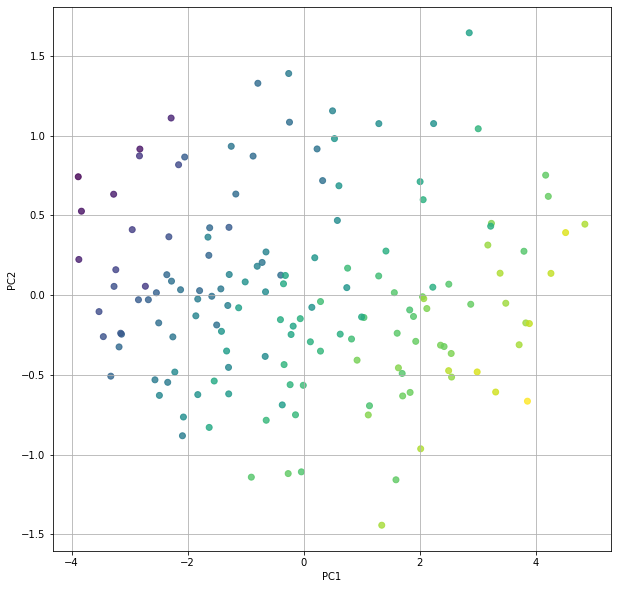

In [6]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(10, 10))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [7]:
# 寄与率
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,0.804057
PC2,0.054051
PC3,0.049957
PC4,0.039154
PC5,0.030101
PC6,0.022680


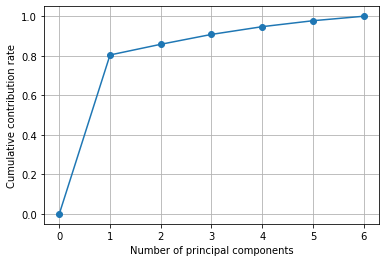

In [8]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [9]:
# 主成分負荷量を算出
eigen_vector = pca.components_
# データフレームに変換
pd.DataFrame(eigen_vector,
             columns = [dfs.columns],
             index = ["PC{}".format(x+1) for x in range(len(dfs.columns))])

,num-books,num-rooms,female-ratio,num-faculties,num-students,num-doctors
PC1,0.397546,0.417847,0.410562,0.417156,0.398580,0.407327
PC2,-0.732606,-0.213198,0.373410,0.334262,0.377811,-0.154685
PC3,-0.279346,-0.003814,0.385340,-0.024319,-0.670241,0.568902
PC4,0.164974,-0.593188,0.208070,-0.522054,0.398138,0.382837
PC5,0.381840,-0.213542,0.650397,0.009895,-0.262098,-0.562840
PC6,0.232795,-0.618437,-0.277862,0.664093,-0.148194,0.152166
